In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

In [2]:
dir = "~/PhD/Intel-Neuromorphic-Research-Project/output/SC_longer_run_TN_params_200e/"

output = pd.read_csv(os.path.expanduser(dir + "train_output.csv"))


In [3]:
train_sum_over_epoch = []
valid_sum_over_epoch = []
sum_over_epoch = []

In [4]:
if os.path.isfile(os.path.expanduser(dir + "hidden_training_spike_counts.npy")):
    training_hidden_spikes = np.load(os.path.expanduser(dir + "hidden_training_spike_counts.npy"))
    validation_hidden_spikes = np.load(os.path.expanduser(dir + "hidden_validation_spike_counts.npy"))
     
    for i in range(training_hidden_spikes.shape[0]):
        train_sum_over_epoch.append(sum(training_hidden_spikes[i]))
        valid_sum_over_epoch.append(sum(validation_hidden_spikes[i]))

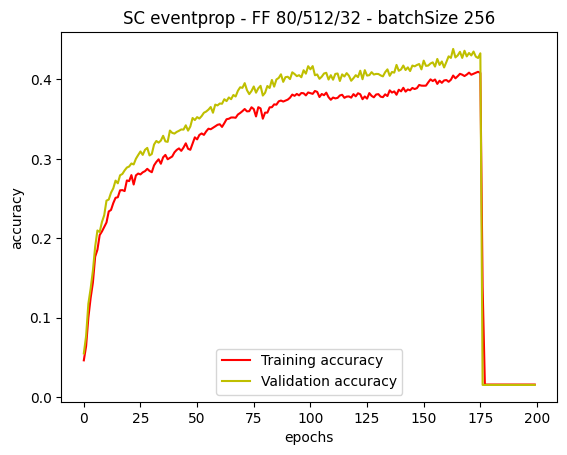

In [5]:
if os.path.isfile(os.path.expanduser(dir + "hidden_training_spike_counts.npy")):

    fig, ax1 = plt.subplots()

    ln1 = ax1.plot(train_sum_over_epoch, label = "Training spikes")
    ln2 = ax1.plot(valid_sum_over_epoch, label = "Validation spikes")

    #ax1.plot(valid_sum_over_epoch, label = "average hidden layer spikes per validation epoch")
    
    ax2 = ax1.twinx()

    ln3 = ax2.plot((np.array(list(output.loc[:, "accuracy"]))*100)[0::2], color = 'r', label = "Training accuracy")
    ln4 = ax2.plot((np.array(list(output.loc[:, "accuracy"]))*100)[1::2], color = 'y', label = "Validation accuracy")
    ax2.set_ylim(0, 100)

    fig.tight_layout()
    plt.title("HD EventProp - FF 80/512/35 - batchSize 256")
    
    lns = ln1+ln2+ln3+ln4
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs)
    
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Average hidden layer spikes per epoch")
    ax2.set_ylabel("Accuracy (%)")
    plt.show()
    
else:
    
    plt.plot(list(output.loc[:, "accuracy"])[0::2], color = 'r', label = "Training accuracy")
    plt.plot(list(output.loc[:, "accuracy"])[1::2], color = 'y', label = "Validation accuracy")
    #plt.ylim(0, 1)
    
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.title("SC eventprop - FF 80/512/32 - batchSize 256")
    plt.legend()
    plt.show()

In [6]:
with open("SC_params.json", "r") as f:
        params = json.load(f)

In [7]:
print(list(params) + ["accuracy"])

['dataset_directory', 'NUM_INPUT', 'NUM_HIDDEN', 'NUM_OUTPUT', 'BATCH_SIZE', 'INPUT_FRAME_TIMESTEP', 'INPUT_SCALE', 'NETWORK_SCALE', 'NUM_EPOCH', 'NUM_FRAMES', 'verbose', 'debug', 'record_all_hidden_spikes', 'lr', 'dt', 'reg_lambda_lower', 'reg_lambda_upper', 'reg_nu_upper', 'recurrent', 'evaluate', 'input_hidden_w_mean', 'input_hidden_w_sd', 'hidden_hidden_w_mean', 'hidden_hidden_w_sd', 'hidden_output_w_mean', 'hidden_output_w_sd', 'aug_combine_images', 'aug_swap_pixels', 'aug_swap_pixels_kSwap', 'aug_swap_pixels_pSwap', 'aug_swap_pixels_tSwap', 'cross_validation', 'cross_validation_run_all', 'sweeping_suffix', 'output_dir', 'model_description', 'accuracy']


In [8]:
# sandbox 

dictionary1 = {'hidden_spike_count': [1, 2, 3, 4]}
dictionary2 = {'hidden_spike_count': [5]}

dictionary3 = {key: value + dictionary2[key] for key, value in dictionary1.items()}

In [9]:
dictionary3

{'hidden_spike_count': [1, 2, 3, 4, 5]}

In [10]:
import math
file_path = os.path.expanduser("~/data/rawSC/rawSC_80input/")
x_train = np.load(file_path + "training_x_data.npy")
math.ceil(0.367)

1

In [11]:
example_filter = list(range(7, # random sample from trial, in this case the trial chosen is 7000 # x1.0 is for validation split!
                    params.get("NUM_EPOCH") * int(math.ceil((len(x_train) * 1.0) / params.get("BATCH_SIZE"))) * params.get("BATCH_SIZE"), 
                    int(math.ceil((len(x_train) * 1.0) / params.get("BATCH_SIZE"))) * params.get("BATCH_SIZE")))

In [12]:
example_filter

[7,
 94855,
 189703,
 284551,
 379399,
 474247,
 569095,
 663943,
 758791,
 853639,
 948487,
 1043335,
 1138183,
 1233031,
 1327879,
 1422727,
 1517575,
 1612423,
 1707271,
 1802119,
 1896967,
 1991815,
 2086663,
 2181511,
 2276359,
 2371207,
 2466055,
 2560903,
 2655751,
 2750599,
 2845447,
 2940295,
 3035143,
 3129991,
 3224839,
 3319687,
 3414535,
 3509383,
 3604231,
 3699079,
 3793927,
 3888775,
 3983623,
 4078471,
 4173319,
 4268167,
 4363015,
 4457863,
 4552711,
 4647559,
 4742407,
 4837255,
 4932103,
 5026951,
 5121799,
 5216647,
 5311495,
 5406343,
 5501191,
 5596039,
 5690887,
 5785735,
 5880583,
 5975431,
 6070279,
 6165127,
 6259975,
 6354823,
 6449671,
 6544519,
 6639367,
 6734215,
 6829063,
 6923911,
 7018759,
 7113607,
 7208455,
 7303303,
 7398151,
 7492999,
 7587847,
 7682695,
 7777543,
 7872391,
 7967239,
 8062087,
 8156935,
 8251783,
 8346631,
 8441479,
 8536327,
 8631175,
 8726023,
 8820871,
 8915719,
 9010567,
 9105415,
 9200263,
 9295111,
 9389959,
 9484807,
 957965

In [13]:
np.array([1, 2, 3]) * 10

array([10, 20, 30])